<a href="https://colab.research.google.com/github/Pallav-Lama/deeplearning-projects/blob/main/NLP_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df_main = pd.read_csv('/content/Twitter_Data.csv')

In [ ]:
df = df_main.copy()

In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.isnull().sum()

clean_text    1
category      1
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(32002, 2)

# EDA

In [ ]:
df.category.value_counts() #imbalanced dataset

 1.0    13569
 0.0    10941
-1.0     7492
Name: category, dtype: int64

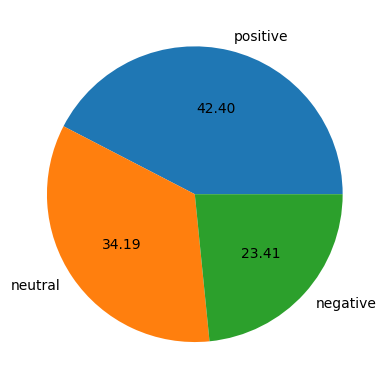

In [ ]:
#visuallizing the v1 i.e. target column
import matplotlib.pyplot as plt
plt.pie(df.category.value_counts(), labels=['positive', 'neutral', 'negative'], autopct='%0.2f')
plt.show()

In [ ]:
df.clean_text[0]

'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import string
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def preprocess(text):
  text = text.lower()
  words = word_tokenize(text)
  #stopwords
  filtered = [word for word in words if (word not in stopwords and word not in string.punctuation)]
  cleaned = set([stemmer.stem(word) for word in filtered])
  return " ".join(cleaned)

In [ ]:
preprocess("Hi! My name is Pallav Lama. I am from Kathmandu which is the Capital city of Nepal")

'hi name nepal pallav kathmandu citi lama capit'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X = df['clean_text']
y = df.category

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
pipe = Pipeline([
    ('vectorizer', CountVectorizer(preprocessor = preprocess)),
    ('model', MultinomialNB())
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(preprocessor=<function preprocess at 0x7ff9cf58f400>)),
                ('model', MultinomialNB())])

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
y_pred = pipe.predict(X_test)
f1 = f1_score(y_test, y_pred,  average='micro')
cf = confusion_matrix(y_pred, y_test)

In [ ]:
f1

0.6811435713169817

In [ ]:
cf

array([[ 785,  154,  167],
       [ 109, 1169,  171],
       [ 583,  857, 2406]])

In [ ]:
#using tfidfvectorizer and multiNB
from sklearn.feature_extraction.text import TfidfVectorizer
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(preprocessor = preprocess)),
    ('model', MultinomialNB())
])
pipe.fit(X_train, y_train)
from sklearn.metrics import f1_score, confusion_matrix
y_pred = pipe.predict(X_test)
f1 = f1_score(y_test, y_pred,  average='micro')
cf = confusion_matrix(y_pred, y_test)
print(f1)
print(cf)

0.5658490860802999
[[ 179   15    5]
 [  74  789   85]
 [1224 1376 2654]]


In [ ]:
#using countvectorizer and decision tree
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([
    ('vectorizer', CountVectorizer(preprocessor = preprocess)),
    ('model', DecisionTreeClassifier())
])
pipe.fit(X_train, y_train)
from sklearn.metrics import f1_score, confusion_matrix
y_pred = pipe.predict(X_test)
f1 = f1_score(y_test, y_pred,  average='micro')
cf = confusion_matrix(y_pred, y_test)
print(f1)
print(cf)

0.787220746758319
[[ 992  121  299]
 [ 153 1859  257]
 [ 332  200 2188]]


In [ ]:
#using tfidfvectorizer and decision trees
from sklearn.feature_extraction.text import TfidfVectorizer
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(preprocessor = preprocess)),
    ('model', DecisionTreeClassifier())
])
pipe.fit(X_train, y_train)
from sklearn.metrics import f1_score, confusion_matrix
y_pred = pipe.predict(X_test)
f1 = f1_score(y_test, y_pred,  average='micro')
cf = confusion_matrix(y_pred, y_test)
print(f1)
print(cf)

0.718637712857366
[[ 871  162  332]
 [ 256 1720  403]
 [ 350  298 2009]]


In [ ]:
#using random forest classifier count Vectorizer
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
    ('vectorizer', CountVectorizer(preprocessor = preprocess)),
    ('model', RandomForestClassifier())
])
pipe.fit(X_train, y_train)
from sklearn.metrics import f1_score, confusion_matrix
y_pred = pipe.predict(X_test)
f1 = f1_score(y_test, y_pred,  average='micro')
cf = confusion_matrix(y_pred, y_test)
print(f1)
print(cf)

0.7905014841431026
[[ 841   51  123]
 [ 282 1984  386]
 [ 354  145 2235]]


In [ ]:
pipe.score(X_test, y_test)

0.7905014841431026

In [ ]:
pipe.predict(["I don't like it very much. It worst"])

array([1.])

In [ ]:
pipe.predict(["when modi promised “minimum government maximum governance” expected him begin the difficult job refo"])

array([-1.])

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def name_entity(sent):
  doc = nlp(sent)
  return spacy.displacy.render(doc, style = 'ent', jupyter = True)

In [ ]:
for word in X_train:
  print(word)

Streaming output truncated to the last 5000 lines.
these feudal goons are frightened due modi with modi top all the corruptscriminalsblackmailers dalals have panicked and joined together stop modi who unstoppable
imran masood kin azhar masood then what about lalit modi and nirav modi  
govt owned air india withdrew its boarding passes bearing photographs modi and gujarat vijay rupani 
omg omg cant believe this
indian car has got four tyres this can happen only modis 
the last years the govt headed narendra modi introduced dbt through banks besides subsidies for food fertilizer kerosene ministries handed over subsidies the poor through the dbt which was enabled aadhaar 
now want request you from our honarable prime minister narendra modi sir please plan some changes for our old voting pattern salaried person and many times leaves out home town our initiative digital india want online voting system aadhar
according ashley tellis modis foreign policy has brought good successes three front

In [ ]:
-